### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [139]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import nltk
from nltk.tokenize import word_tokenize

from sklearn import datasets  
from sklearn import linear_model 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [39]:
# Load the CSV file(s) as reviews.
tur_rev = pd.read_csv('turtle_reviews.csv')

# View the DataFrame

tur_rev.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [40]:
print(tur_rev.shape)

(2000, 11)


In [41]:
print(tur_rev.dtypes)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [42]:
tur_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Any missing values?
tur_rev.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [8]:
# Descriptive statistics.

tur_rev.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [43]:
tur_rev.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [44]:
# Drop unnecessary columns.
tur_rev.drop(tur_rev.columns[[6,7]], axis=1, inplace=True)

# View column names.


In [45]:
tur_rev.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [46]:
# Rename the column headers.
tur_rev.rename(columns = {'remuneration (k£)' : 'renumeration'}, inplace= True)
tur_rev.rename(columns = {'spending_score (1-100)' : 'spending_score'}, inplace=True)
# View column names.
tur_rev.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [47]:
# Create a CSV file as output.
tur_rev.to_csv('Tur_rev_Ver1.csv')

In [48]:
# Import new CSV file with Pandas.
tur_rev = pd.read_csv('Tur_rev_Ver1.csv')

# View DataFrame.
tur_rev.head()

,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [49]:
tur_rev.columns

Index(['Unnamed: 0', 'gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 5. Linear regression

### 5a) Spending vs Loyalty

In [60]:
# Independent variable.
X_spnd_loyal = tur_rev['spending_score']

# Dependent variable.
y = tur_rev['loyalty_points']

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = tur_rev).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        21:23:06   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

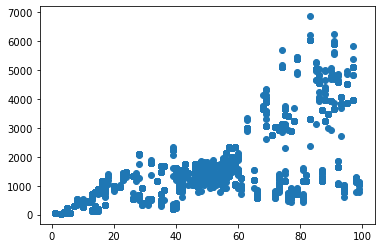

In [62]:
plt.scatter(X_spnd_loyal, y)

In [61]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard Errors:", test.bse) 

# Extract the predicted values.
print("Predicted values:", test.predict())

Parameters: Intercept   -75.052663
X            33.061693
dtype: float64
Standard Errors: Intercept    45.930554
X             0.814419
dtype: float64
Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [58]:
# X coefficient= 33.061 and the constant= -75.052 to generate the regression table.

y_pred_spend_loyal = (33.061 * X_spnd_loyal) - 75.052

# View the output.
y_pred_spend_loyal

0       1214.327
1       2602.889
2        123.314
3       2470.645
4       1247.388
          ...   
1995    2206.157
1996     189.436
1997    2933.499
1998     453.924
1999     189.436
Name: spending_score, Length: 2000, dtype: float64

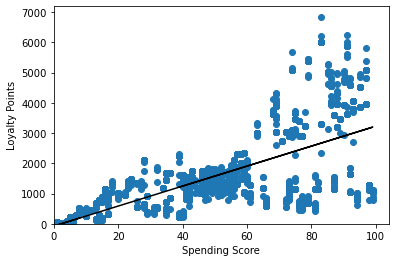

In [64]:
# Plot the graph with a regression line.

plt.scatter(X_spnd_loyal,y)  

# Plot the regression line (in black).
plt.plot(X_spnd_loyal,y_pred_spend_loyal, color='black') 


# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")
plt.show()

### 5b) renumeration vs loyalty

In [19]:
# Independent variable.
X_renum_loyal = tur_rev['renumeration']

# Dependent variable.
y_renum_loyal = tur_rev['loyalty_points']

# OLS model and summary.
f = 'y_renum_loyal ~ X_renum_loyal'
test = ols(f, data = tur_rev).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_renum_loyal   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        15:42:02   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -65.6865     52.171     -1.259      0.208    -168.001      36.628
X_renum_loyal    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept       -65.686513
X_renum_loyal    34.187825
dtype: float64
Standard errors:  Intercept        52.170717
X_renum_loyal     0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [21]:
# X coefficient= 34.1878 and the constant= -65.052 to generate the regression table.

y_pred_renum_loyal = 34.1878 * tur_rev['renumeration'] - 65.052

# View the output.
y_pred_renum_loyal

0        355.457940
1        355.457940
2        383.491936
3        383.491936
4        411.525932
           ...     
1995    2822.449588
1996    3102.789548
1997    3102.789548
1998    3299.027520
1999    3102.789548
Name: renumeration, Length: 2000, dtype: float64

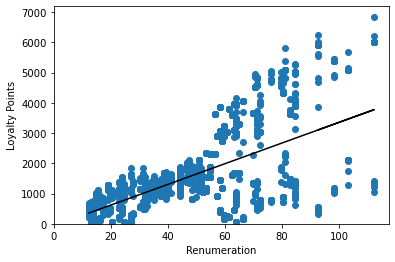

In [65]:
# Plot graph with regression line.
plt.scatter(X_renum_loyal, y_renum_loyal)

# Plot the regression line (in black).
plt.plot(X_renum_loyal,y_pred_renum_loyal, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Renumeration")
plt.ylabel("Loyalty Points")
plt.show()

### 5c) age vs loyalty

In [68]:
# Independent variable.
X_age_loyal = tur_rev['age']

# Dependent variable.
y_age_loyal = tur_rev['loyalty_points']

# OLS model and summary.
f = 'y_age_loyal ~ X_age_loyal'
test = ols(f, data = tur_rev).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            y_age_loyal   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 06 Sep 2022   Prob (F-statistic):             0.0577
Time:                        22:14:03   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1736.5177     88.249     19.678      0.000    1563.449    1909.587
X_age_loyal    -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept      1736.517739
X_age_loyal      -4.012805
dtype: float64
Standard errors:  Intercept      88.248731
X_age_loyal     2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [70]:
# Set the X coefficient=-4.0128 and the constant=1736.51 to generate the regression table.
y_pred_age_loyal = -4.0128 * tur_rev['age'] + 1736.517

# View the output.
y_pred_age_loyal

0       1664.2866
1       1644.2226
2       1648.2354
3       1636.1970
4       1604.0946
          ...    
1995    1588.0434
1996    1563.9666
1997    1600.0818
1998    1600.0818
1999    1608.1074
Name: age, Length: 2000, dtype: float64

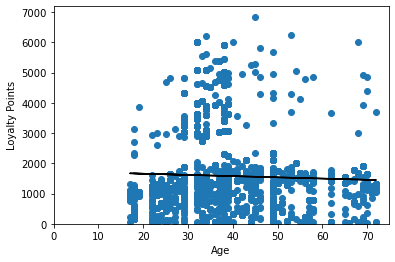

In [71]:
# Plot graph with regression line.
plt.scatter(X_age_loyal, y_age_loyal)

# Plot the regression line 
plt.plot(X_age_loyal,y_pred_age_loyal, color='black')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Age")
plt.ylabel("Loyalty Points")
plt.show()

## 6. Observations and insights

***Your observations here...***






### Observations:

##### Spending vs loyalty: 

##### Renumeration vs loyalty: 

##### Age vs loyalty:

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [73]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [77]:
# Load the CSV file(s) as df2.
tur_rev_clus= pd.read_csv('Tur_rev_Ver1.csv', index_col=[0])

# View DataFrame.
tur_rev_clus.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [78]:
# Drop unnecessary columns.
tur_rev_clus.drop(columns=['age','gender','review','summary','education', 'product', 'loyalty_points'], inplace = True)

# View DataFrame.

tur_rev_clus.head()

,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [ ]:
# Explore the data.
tur_rev_clus.info()

In [ ]:
# Descriptive statistics.
tur_rev_clus.describe()

## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

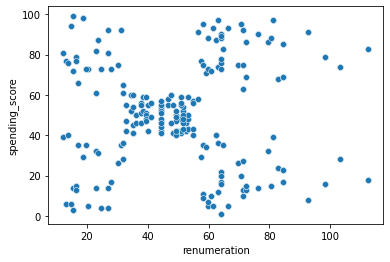

In [51]:
# Create a scatterplot with Seaborn.
from matplotlib import pyplot as plt
import seaborn as sns

#create a scatterplot with seaborn
sns.scatterplot(x='renumeration', y='spending_score', data=tur_rev_clus)

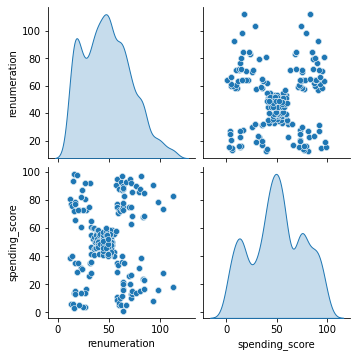

In [53]:
# Create a pairplot with Seaborn.
x = tur_rev_clus[['renumeration','spending_score']]

sns.pairplot(tur_rev_clus, vars=x, diag_kind = 'kde')

## 3. Elbow and silhoutte methods

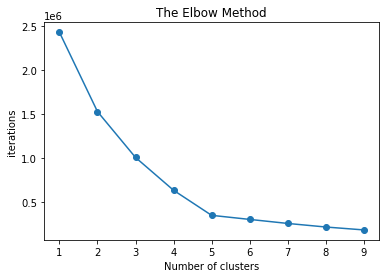

In [58]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

#elbow chart to decide on the number of optimal clusters
clusters = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(x)
    clusters.append(kmeans.inertia_)

plt.plot(range(1, 10), clusters, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("iterations")

plt.show()

Text(0, 0.5, 'Sil')

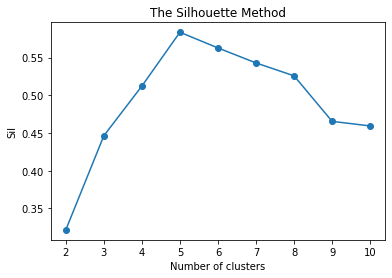

In [61]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))
    
# Plot the silhouette method

plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")


## 5. Fit final model and justify your choice

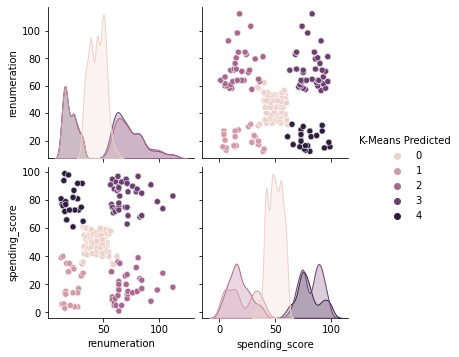

In [64]:
# Use 5 Clusters
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters_1 = kmeans.labels_
x['K-Means Predicted'] = clusters_1

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')




In [65]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
sns.

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


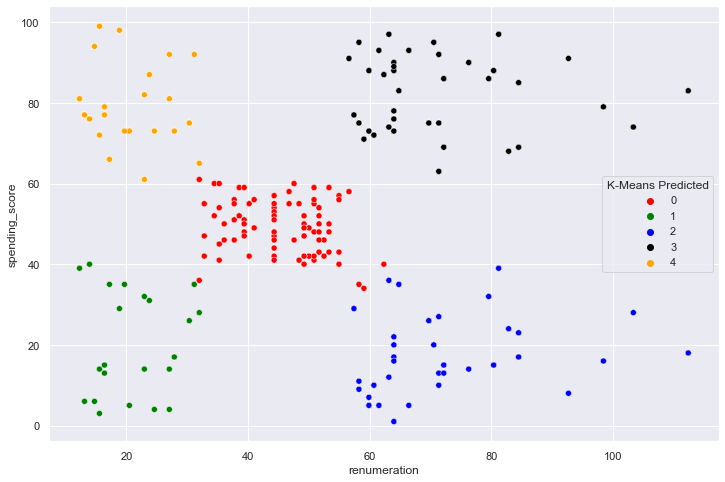

In [67]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.

print(x.head())

## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [118]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [119]:
# Load the data set.
tur_nlp= pd.read_csv('Tur_rev_Ver1.csv', index_col=[0])

# View DataFrame
tur_nlp


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [168]:
type(tur_nlp)

pandas.core.frame.DataFrame

In [120]:
# Explore data set.
print(tur_nlp.shape)

(2000, 9)


In [121]:
print(tur_nlp.dtypes)

gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


In [122]:
tur_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 156.2+ KB


In [123]:
tur_nlp.isnull().sum()

gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [124]:
tur_nlp.describe()

,age,renumeration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [125]:
# Keep necessary columns. Drop unnecessary columns.
tur_nlp.drop(columns=['age','gender','renumeration','spending_score','education', 'product', 'loyalty_points'], inplace = True)

# View DataFrame.
tur_nlp

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [170]:
type(tur_nlp)

pandas.core.frame.DataFrame

In [126]:
# Determine if there are any missing values.
tur_nlp.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [127]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
tur_nlp['review'] = tur_nlp['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tur_nlp['summary'] = tur_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
tur_nlp

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


In [171]:
type(tur_nlp)

pandas.core.frame.DataFrame

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [128]:
# Replace all the punctuations in review column.
tur_nlp['review'] = tur_nlp['review'].str.replace('[^\w\s]','') 
tur_nlp['summary'] = tur_nlp['summary'].str.replace('[^\w\s]','') 

# View output.
tur_nlp

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [172]:
type(tur_nlp)

pandas.core.frame.DataFrame

### 2c) Drop duplicates in both columns

In [129]:
# Drop duplicates in both columns.
tur_nlp.review.duplicated().sum


# View DataFrame.


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998     True
1999    False
Name: review, Length: 2000, dtype: bool>

In [130]:
tur_nlp.summary.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Name: summary, Length: 2000, dtype: bool>

In [131]:
# Dropping duplicates from 'review' column
tur_nlp_drop = tur_nlp.drop_duplicates(subset=['review'])


tur_nlp_drop.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [173]:
type(tur_nlp_drop)

pandas.core.frame.DataFrame

In [132]:
# Dropping duplicates from 'summary' column
tur_nlp_drop = tur_nlp.drop_duplicates(subset=['summary'])

## 3. Tokenise and create wordclouds

In [138]:
# Create new DataFrame (copy DataFrame).
tur_nlp_token = tur_nlp_drop

# View DataFrame.
tur_nlp_token

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1992,great game to keep the mind active we play it ...,great game to keep the mind active
1994,we are retired and find this a great way to st...,a great mind game


In [175]:
type(tur_nlp_token)

pandas.core.frame.DataFrame

In [177]:
tur_nlp_token

,review,summary,tokens_review,tokens_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...
1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words,"[this, is, a, fun, card, game, for, people, wh...","[this, is, a, fun, card, game, for, people, wh..."
1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...,"[fun, for, the, family, just, make, certain, y...","[sort, of, a, card, game, equivalent, of, scra..."
1992,great game to keep the mind active we play it ...,great game to keep the mind active,"[great, game, to, keep, the, mind, active, we,...","[great, game, to, keep, the, mind, active]"
1994,we are retired and find this a great way to st...,a great mind game,"[we, are, retired, and, find, this, a, great, ...","[a, great, mind, game]"


In [242]:
# Apply tokenisation to both columns.
tur_nlp_token['tokens_review'] = tur_nlp_token['review'].apply(word_tokenize)
tur_nlp_token['tokens_summary'] = tur_nlp_token['summary'].apply(word_tokenize)

# View DataFrame.
tur_nlp_token

,level_0,index,review,summary,tokens_review,tokens_summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...,...,...
1346,1346,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words,"[this, is, a, fun, card, game, for, people, wh...","[this, is, a, fun, card, game, for, people, wh..."
1347,1347,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...,"[fun, for, the, family, just, make, certain, y...","[sort, of, a, card, game, equivalent, of, scra..."
1348,1348,1992,great game to keep the mind active we play it ...,great game to keep the mind active,"[great, game, to, keep, the, mind, active, we,...","[great, game, to, keep, the, mind, active]"
1349,1349,1994,we are retired and find this a great way to st...,a great mind game,"[we, are, retired, and, find, this, a, great, ...","[a, great, mind, game]"


In [243]:
# Reseting Index before adding tokens in a list

tur_nlp_token = tur_nlp_token.reset_index() # May result in error if index has previously been resetted

ValueError: cannot insert level_0, already exists

In [208]:
# Tokens for REVIEWS
# Define an empty list of tokens.
all_tokens_review = []

# Loop for adding all tokenised words in the list
for i in range(tur_nlp_token.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + tur_nlp_token['tokens_review'][i]

In [218]:
# Copying REVIEW tokens in a string for a Word Cloud
all_tokens_review_string = ''

for value in all_tokens_review:
    all_tokens_review_string = all_tokens_review_string + value + ' '


In [219]:
# Verifying REVIEW String
all_tokens_review_string

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could 

In [211]:
tur_nlp_token = tur_nlp_token.reset_index()

In [213]:
# Token for SUMMARY
# Defining an empty list of token
all_tokens_summary = []

# Loop for adding all tokenised words in the list
for i in range(tur_nlp_token.shape[0]):
    #Add each token to the list
    all_tokens_summary = all_tokens_summary + tur_nlp_token['tokens_summary'][i]


In [217]:
all_tokens_summary

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

In [220]:
# Copying SUMMARY tokens in a string for a Word Cloud
all_tokens_summary_string = ''

for value in all_tokens_summary:
    all_tokens_summary_string = all_tokens_summary_string + value + ' '

In [221]:
# Verifying SUMMARY String
all_tokens_summary_string

'the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap best gm screen ever great but could be even better another missed opportunity not a value add to the product line love the map not a general dm screen very weak game fell completely flat good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a great buy cant wait to work on this book stained glass perfection four stars so beautiful very nice three stars i like every image contained in this stained glass coloring book creativ

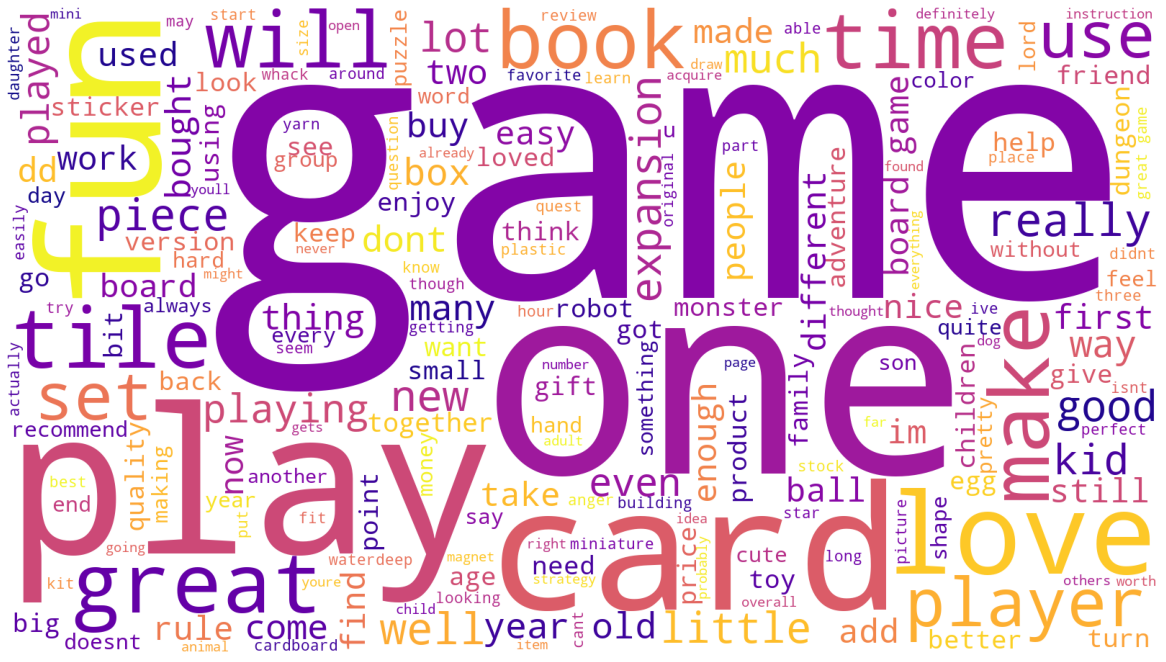

In [222]:
# Review: Create a word cloud.

wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_tokens_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


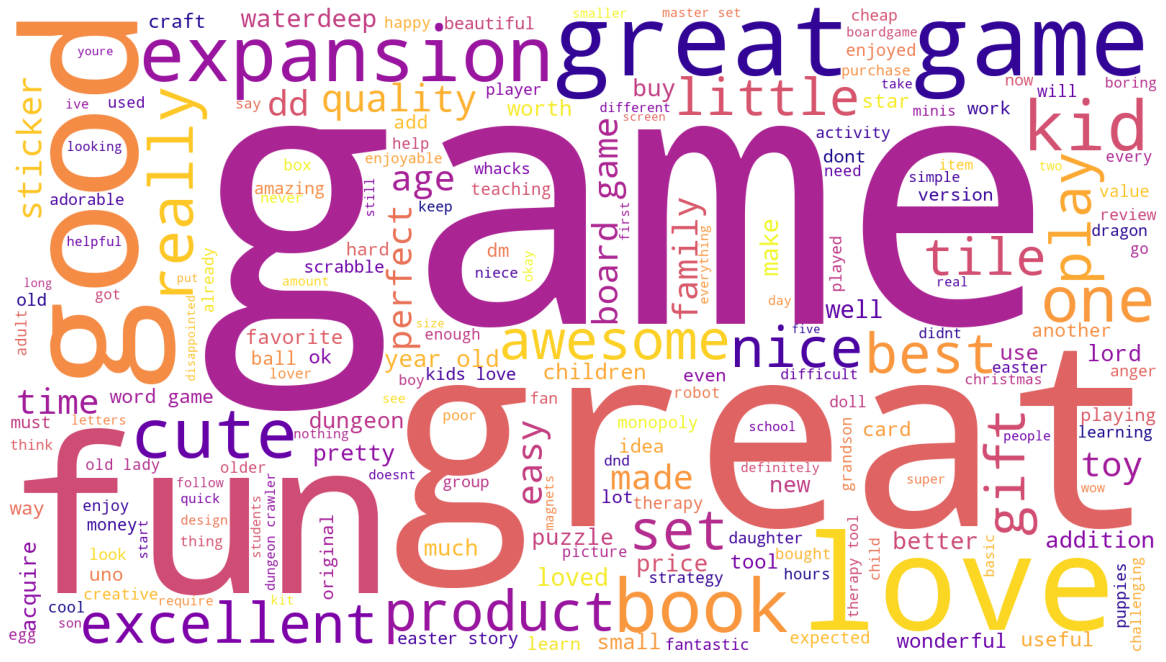

In [223]:
# Summary: Create a word cloud.

wordcloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_tokens_summary_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [225]:
# Determine the frequency distribution.
# Frequency Distribution REVIEW

fdist_review = FreqDist(all_tokens_review)

# Viewing the data
fdist_review

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [226]:
# Frequency Distribution SUMMARY

fdist_summary = FreqDist(all_tokens_summary)

# Viewing the data
fdist_summary

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [233]:
# Delete all the alpanum.
# REVIEW: Filtering out tokens that are neither alphabets nor numbers

all_tokens_review_alphanum = [word for word in all_tokens_review if word.isalnum()] 
all_tokens_summary_alphanum = [word for word in all_tokens_summary if word.isalnum()]



In [234]:
# Remove all the stopwords

# Downloading English Stop words
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Creating a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.

# REVIEW
all_tokens_review_alphanum_stop = [x for x in all_tokens_review_alphanum if x.lower() not in english_stopwords]

# SUMMARY
all_tokens_summary_alphanum_stop = [x for x in all_tokens_summary_alphanum if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atifh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [228]:
# Create a wordcloud without stop words.
# New String for REVIEW without the stopwords

# Copying REVIEW (without stop words) tokens in a string for a Word Cloud
review_tokens_string_aplhastop = ''

for value in all_tokens_review_alphanum_stop:
    review_tokens_string_aplhastop = review_tokens_string_aplhastop + value + ' '

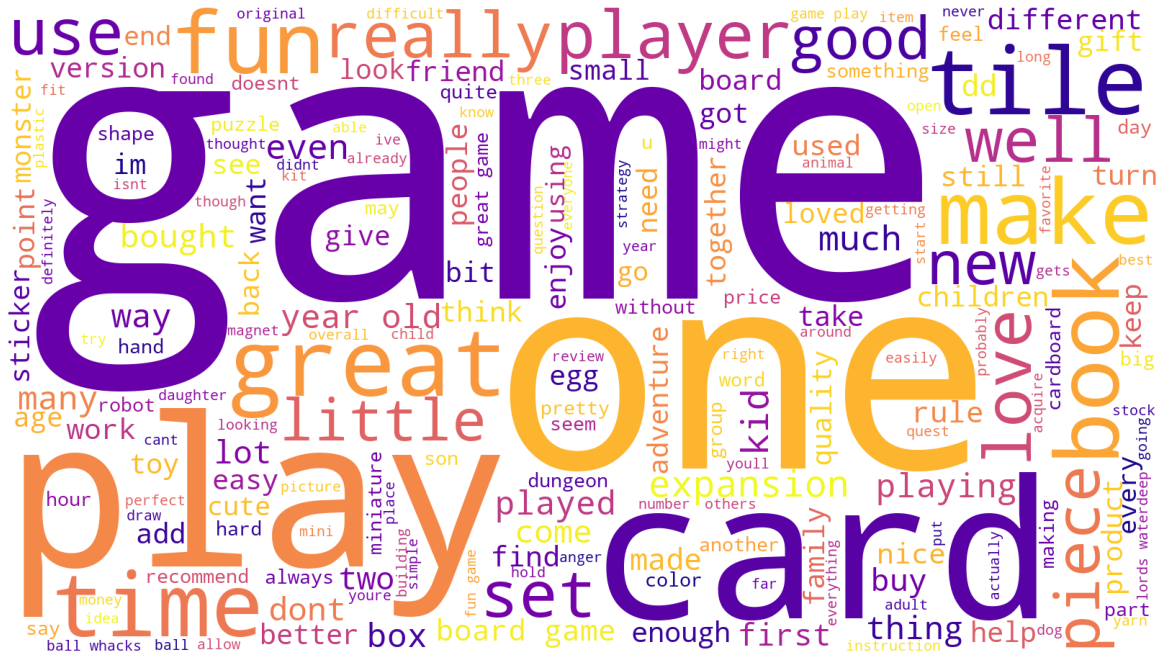

In [229]:
# Plot the wordcloud image for REVIEW

wordcloud_review_alphastop = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens_string_aplhastop) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review_alphastop) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [267]:
# Create a wordcloud without stop words.
# New String for REVIEW without the stopwords

# Copying SUMMARY (without stop words) tokens in a string for a Word Cloud
summary_tokens_string_aplhastop = ''

for value in all_tokens_summary_alphanum_stop:
    summary_tokens_string_aplhastop = summary_tokens_string_aplhastop + value + ' '

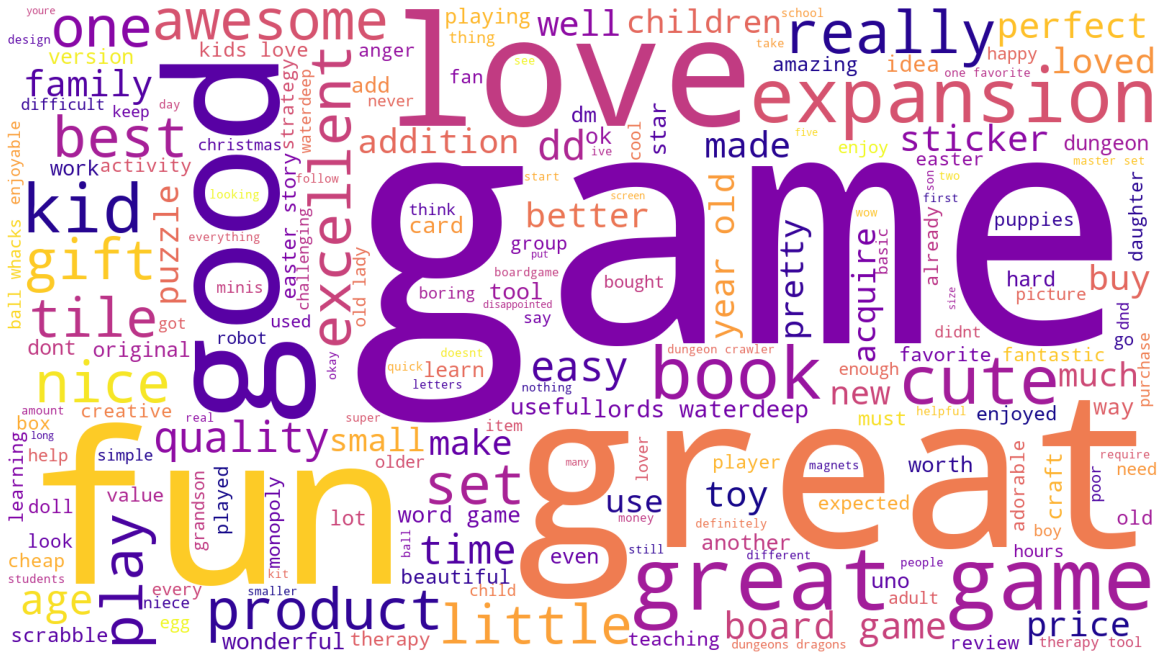

In [236]:
# Plot the wordcloud image for SUMMARY

wordcloud_summary_alphastop = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens_string_aplhastop) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary_alphastop) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [237]:
# Most Frequent words in REVIEWs
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for REVIEW.
counts_review = pd.DataFrame(Counter(all_tokens_review_alphanum_stop).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1360
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


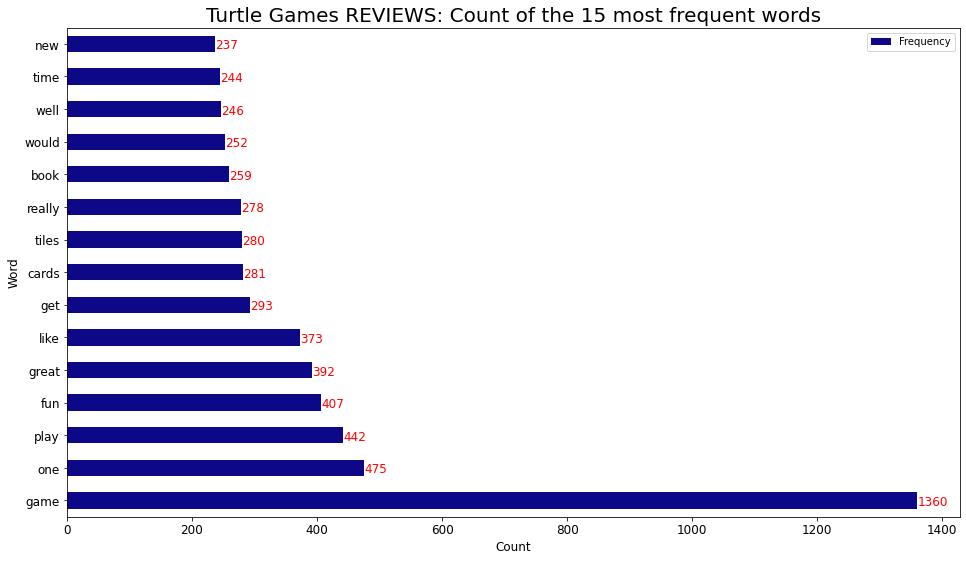

In [238]:
# Determine the 15 most common words.
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games REVIEWS: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [239]:
# Most Frequent words in SUMMARY
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for SUMMARY.
counts_summary = pd.DataFrame(Counter(all_tokens_summary_alphanum_stop).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


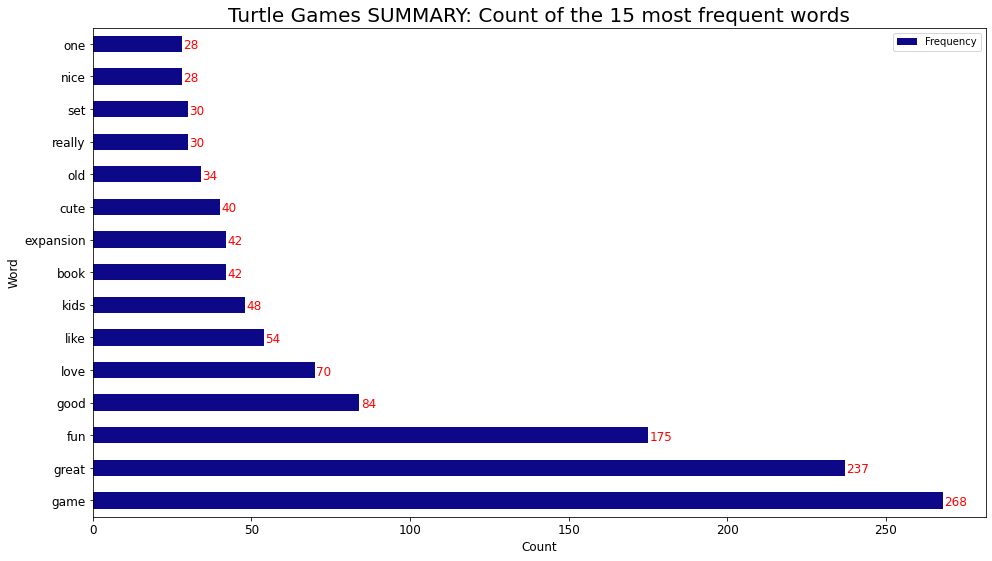

In [240]:
# Determine the 15 most common words.
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games SUMMARY: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [241]:
# Import the TextBlob
from textblob import TextBlob

In [244]:
tur_nlp_token.head()

,level_0,index,review,summary,tokens_review,tokens_summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [252]:
# Define a function to extract a polarity score for REVIEW

def generate_review_polarity(review):
    return TextBlob(review).sentiment[0]

# Defining a new column with polarity scores for each REVIEW
tur_nlp_token['polarity_review'] = tur_nlp_token['review'].apply(generate_review_polarity)

# Reviewing the result
tur_nlp_token['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [253]:
# Define a function to extract a polarity score for SUMMARY

def generate_summary_polarity(summary):
    return TextBlob(summary).sentiment[0]

# Defining a new column with polarity scores for each Summary
tur_nlp_token['polarity_summary'] = tur_nlp_token['summary'].apply(generate_summary_polarity)

# Reviewing the result
tur_nlp_token['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [251]:
tur_nlp_token

,level_0,index,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000
3,3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000
4,4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...,...,...,...,...
1346,1346,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words,"[this, is, a, fun, card, game, for, people, wh...","[this, is, a, fun, card, game, for, people, wh...",0.250000,-0.050000
1347,1347,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...,"[fun, for, the, family, just, make, certain, y...","[sort, of, a, card, game, equivalent, of, scra...",0.171429,-0.400000
1348,1348,1992,great game to keep the mind active we play it ...,great game to keep the mind active,"[great, game, to, keep, the, mind, active, we,...","[great, game, to, keep, the, mind, active]",0.155208,0.088889
1349,1349,1994,we are retired and find this a great way to st...,a great mind game,"[we, are, retired, and, find, this, a, great, ...","[a, great, mind, game]",0.400000,0.200000


#### Visualizing Polarity Scores

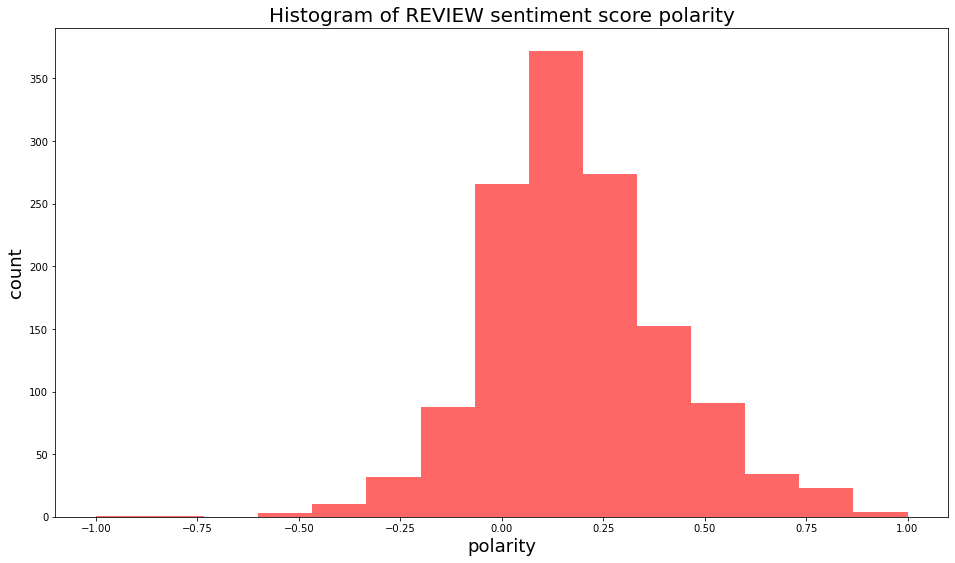

In [254]:
# Histogram for REVIEW Polarity 
# set the number of bins
num_bins = 15

# set the plot area
plt.figure(figsize=(16,9))

# Define the bars
n, bins, patches = plt.hist(tur_nlp_token['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels
plt.xlabel('polarity', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Histogram of REVIEW sentiment score polarity', fontsize=20)

plt.show();

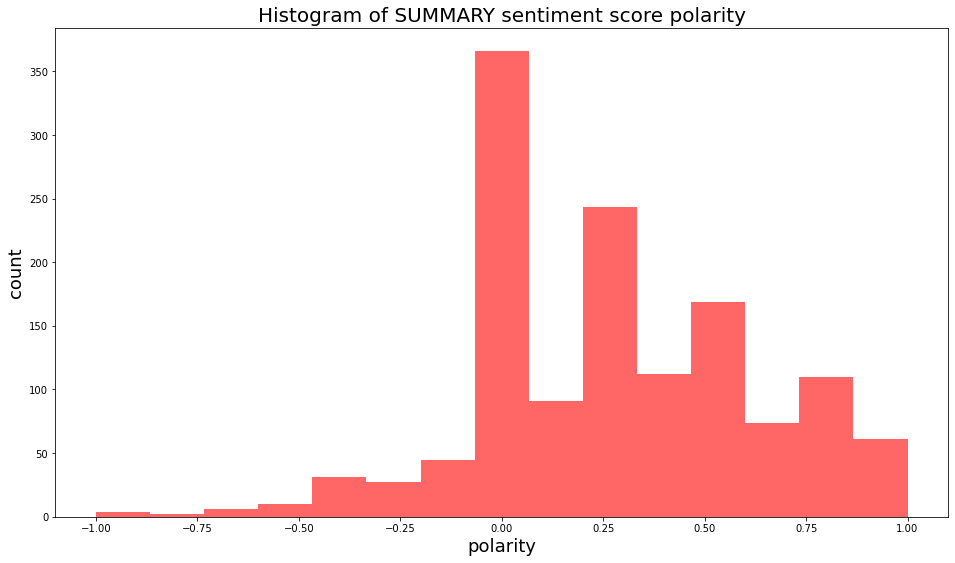

In [268]:
# Histogram for SUMMARY Polarity 
# set the number of bins
num_bins = 15

# set the plot area
plt.figure(figsize=(16,9))

# Define the bars
n, bins, patches = plt.hist(tur_nlp_token['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels
plt.xlabel('polarity', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Histogram of SUMMARY sentiment score polarity', fontsize=20)

plt.show();

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [263]:
# Top 20 negative summary.
# Create a DataFrame
negative_summary_sentiment = tur_nlp_token.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns
negative_summary_sentiment = negative_summary_sentiment[['summary', 'polarity_summary']]

# Adjust the column width
# View output
negative_summary_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})




,summary,polarity_summary
17,the worst value ive ever seen,-1.000000
165,boring unless you are a craft person which i am,-1.000000
588,boring,-1.000000
838,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming methods,-0.700000
635,too bad this is not what i was expecting,-0.700000
638,bad qualityall made of paper,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


In [264]:
# Top 20 negative summaries.
# Create a DataFrame
negative_review_sentiment = tur_nlp_token.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns
negative_review_sentiment = negative_review_sentiment[['review', 'polarity_review']]

# Adjust the column width
# View output
negative_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,polarity_review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
147,incomplete kit very disappointing,-0.780000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000
714,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000


In [265]:
# Top 20 positive summaries.
positive_summary_sentiment = tur_nlp_token.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns
positive_summary_sentiment = positive_summary_sentiment[['summary', 'polarity_summary']]

# Adjust the column width
# View output
positive_summary_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})




,summary,polarity_summary
5,best gm screen ever,1.000000
23,wonderful designs,1.000000
27,perfect,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000
107,perfect for preschooler,1.000000
112,awesome sticker activity for the price,1.000000
132,awesome book,1.000000
133,he was very happy with his gift,1.000000
150,awesome,1.000000
166,awesome and welldesigned for 9 year olds,1.000000


In [266]:
# Top 20 positive summaries.
positive_summary_sentiment = tur_nlp_token.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns
positive_summary_sentiment = positive_summary_sentiment[['summary', 'polarity_summary']]

# Adjust the column width
# View output
positive_summary_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})



,summary,polarity_summary
5,best gm screen ever,1.000000
23,wonderful designs,1.000000
27,perfect,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000
107,perfect for preschooler,1.000000
112,awesome sticker activity for the price,1.000000
132,awesome book,1.000000
133,he was very happy with his gift,1.000000
150,awesome,1.000000
166,awesome and welldesigned for 9 year olds,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

# 